In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("datasets/auto_mpg_data_tvs.txt",sep='\t',header=0)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [3]:
from scipy.stats import shapiro
from scipy.stats import kstest,norm

sample = df['mpg'].sample(n=50)
print('shapiro')
stat, p_value = shapiro(sample)
print('stat', stat)
print('p-value', p_value)
if p_value > 0.05:
  print('Acepta H0: tienen distribuccion normal')
else:
    print('Acepto H1: no tiene distribución normal')

print()

shapiro
stat 0.9577189683914185
p-value 0.07134084403514862
Acepta H0: tienen distribuccion normal



In [4]:
sample = df['mpg'].sample(n=50)
print('kstest')
stat, p_value = kstest(sample, norm.cdf)
print('stat', stat)
print('p-value', p_value)
if p_value > 0.05:
  print('Acepta H0: tienen distribuccion normal')
else:
    print('Acepto H1: no tiene distribución normal')

print()

kstest
stat 1.0
p-value 0.0
Acepto H1: no tiene distribución normal



In [5]:
#teorema del limite central
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

In [6]:

population=pd.read_csv("datasets/employee_salary.csv",sep=',',header=0)
population

,Department,Department Name,Division,Gender,Base Salary,2019 Overtime Pay,2019 Longevity Pay,Grade
0,BOA,Board of Appeals Department,Board of Appeals Division,F,78902.00,0.0,0.0,18
1,BOA,Board of Appeals Department,Board of Appeals Division,F,58481.91,0.0,0.0,16
2,BOA,Board of Appeals Department,Executive Director,F,144751.00,0.0,0.0,M3
3,BOE,Board of Elections,Director,F,183654.18,0.0,0.0,M1
4,BOE,Board of Elections,Polling Place Management,F,62488.00,0.0,0.0,13
...,...,...,...,...,...,...,...,...
10100,SHF,Sheriff's Office,Administration,M,92217.23,0.0,0.0,26
10101,ZAH,Office of Zoning and Administrative Hearings,Director,M,179523.00,0.0,0.0,0
10102,ZAH,Office of Zoning and Administrative Hearings,Zoning and Administrative Hearings,F,90848.00,0.0,0.0,21
10103,ZAH,Office of Zoning and Administrative Hearings,Zoning and Administrative Hearings,F,170707.00,0.0,0.0,35


In [7]:
population_base_salary=population['Base Salary'] #sacar solo la variable para poder manipularla mas facil

In [8]:
print("population mean",population_base_salary.mean())
print("population median",population_base_salary.median())
print("population mode",population_base_salary.mode())
print("population skew",population_base_salary.skew())
print("population kurtosis",population_base_salary.kurtosis())
print("population std",population_base_salary.std())
print("population var",population_base_salary.var())


population mean 78936.0202394854
population median 75290.0
population mode 0    93706.0
Name: Base Salary, dtype: float64
population skew 0.8472817753514368
population kurtosis 1.6559357755244624
population std 30654.491034288392
population var 939697820.5712674


Text(0, 0.5, 'probabilty density')

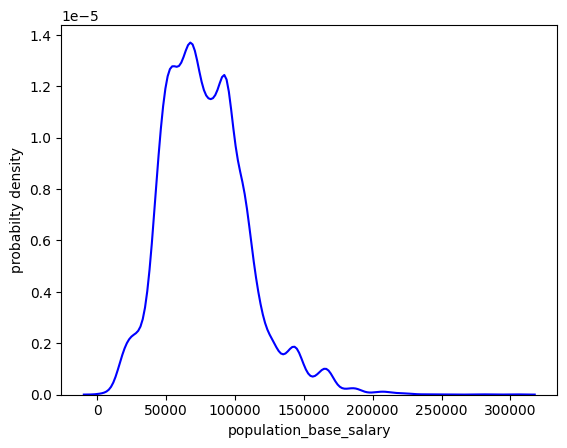

In [9]:
sns.distplot(population_base_salary,hist=False,kde=True,color='blue')
plt.xlabel('population_base_salary')
plt.ylabel('probabilty density')

In [10]:
mean=[]

def calc_sample_mean(data,sample_size,no_sample_means):
    for i in range (no_sample_means):
        sample=data.sample(n=sample_size)
        no_sample_mean=sample.mean()
        mean.append(no_sample_mean)
    return (mean)

Text(0, 0.5, 'probability density')

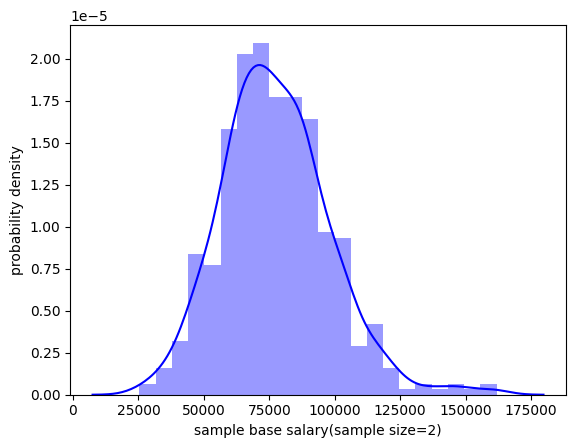

In [11]:
mean_2=calc_sample_mean(data=population_base_salary,sample_size=2,no_sample_means=500)

sns.distplot(mean_2,color='b')
plt.xlabel('sample base salary(sample size=2)')
plt.ylabel('probability density')

Text(0, 0.5, 'probability density')

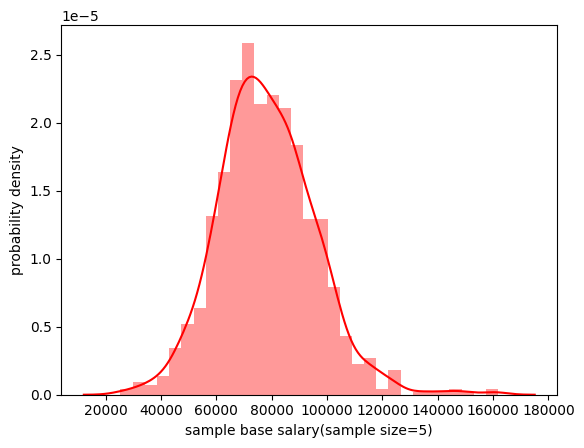

In [12]:
mean_3=calc_sample_mean(data=population_base_salary,sample_size=5,no_sample_means=500)

sns.distplot(mean_3,color='r')
plt.xlabel('sample base salary(sample size=5)')
plt.ylabel('probability density')

Text(0, 0.5, 'probability density')

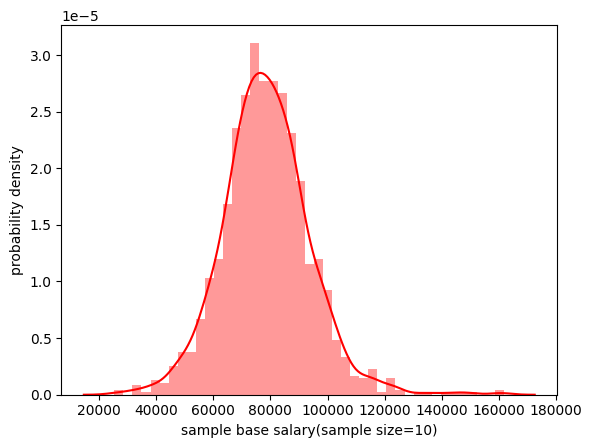

In [13]:
mean_10=calc_sample_mean(data=population_base_salary,sample_size=10,no_sample_means=500)

sns.distplot(mean_10,color='r')
plt.xlabel('sample base salary(sample size=10)')
plt.ylabel('probability density')

Text(0, 0.5, 'probability density')

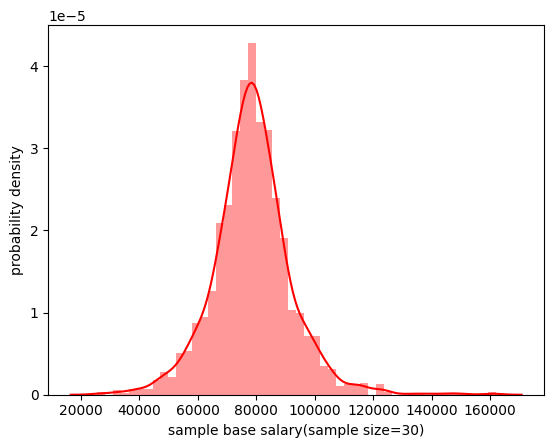

In [14]:
mean_30=calc_sample_mean(data=population_base_salary,sample_size=30,no_sample_means=500)

sns.distplot(mean_30,color='r')
plt.xlabel('sample base salary(sample size=30)')
plt.ylabel('probability density')

Text(0, 0.5, 'probability density')

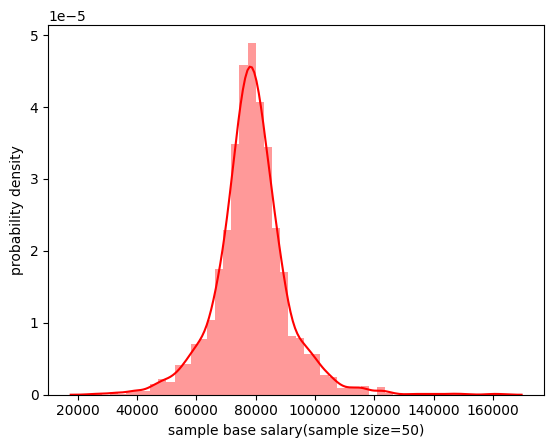

In [15]:
mean_50=calc_sample_mean(data=population_base_salary,sample_size=50,no_sample_means=500)

sns.distplot(mean_50,color='r')
plt.xlabel('sample base salary(sample size=50)')
plt.ylabel('probability density')

In [19]:
df_coches=pd.read_csv("datasets/auto_mpg_data_tvs.txt",sep='\t',header=0)
df_coches.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [24]:
df_coches[['origin','cylinders','model_year']].corr()#para la correlacion 


,origin,cylinders,model_year
origin,1.000000,-0.562543,0.180662
cylinders,-0.562543,1.000000,-0.348746
model_year,0.180662,-0.348746,1.000000


<Axes: >

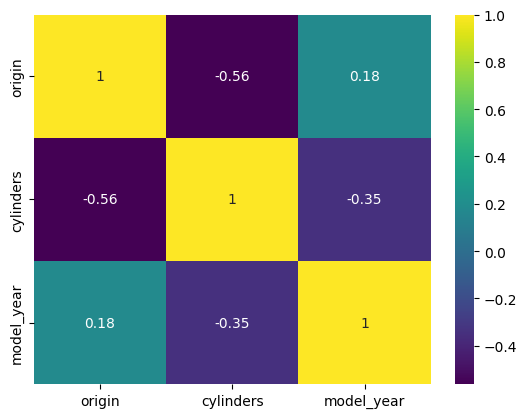

In [34]:
corr=df_coches[['origin','cylinders','model_year']].corr()
sns.heatmap(corr,annot=True,cmap='viridis')

<Axes: >

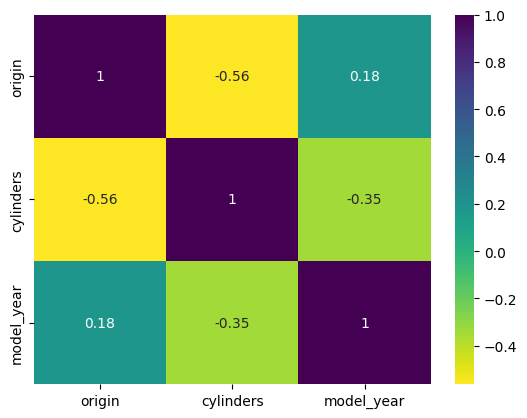

In [36]:
corr=df_coches[['origin','cylinders','model_year']].corr()
sns.heatmap(corr,annot=True,cmap='viridis_r')

In [37]:
#si tiene punto floante ya no es pearson

In [43]:
corr=df_coches[['mpg','weight','acceleration']].corr(method='spearman')
corr#spearman

,mpg,weight,acceleration
mpg,1.000000,-0.874947,0.438677
weight,-0.874947,1.000000,-0.404550
acceleration,0.438677,-0.404550,1.000000


<Axes: >

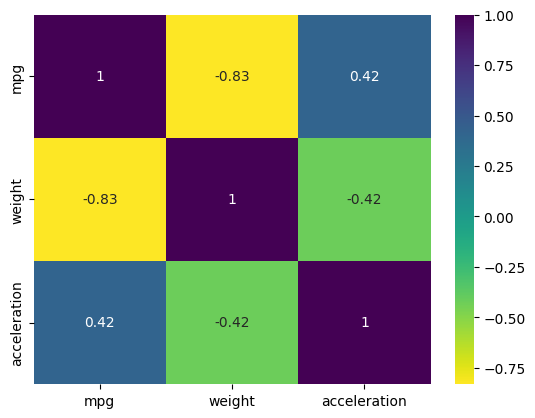

In [47]:
sns.heatmap(corr,annot=True,cmap='viridis_r')

2023-11-01 16:58:34.629 
  command:

    streamlit run C:\Users\franc\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]
